In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = yf.download("AAPL", start="2020-01-01", end="2022-12-31", threads=False)


C:\Users\varun\AppData\Local\Temp\ipykernel_24444\2298902265.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2022-12-31", threads=False)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
1,2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2,2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
3,2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
4,2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200
...,...,...,...,...,...,...
751,2022-12-23,130.173798,130.726634,127.982185,129.245816,63814900
752,2022-12-27,128.367188,129.729545,127.073942,129.699930,69007800
753,2022-12-28,124.428215,129.354401,124.260391,128.011792,85438400


In [5]:
ma_100_days = data.Close.rolling(100).mean()

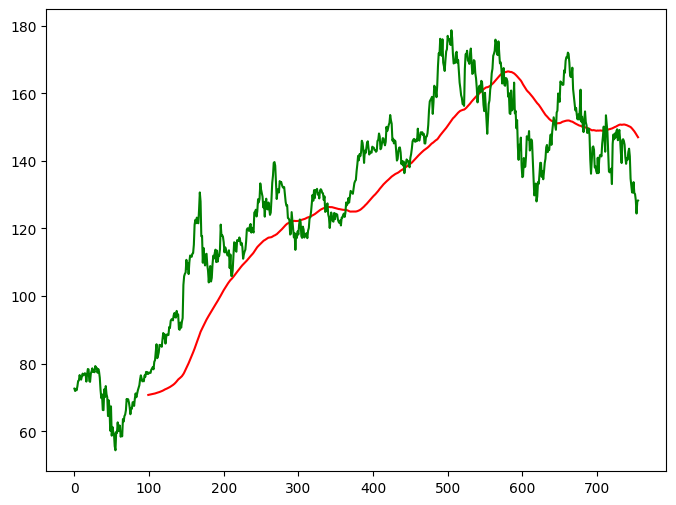

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

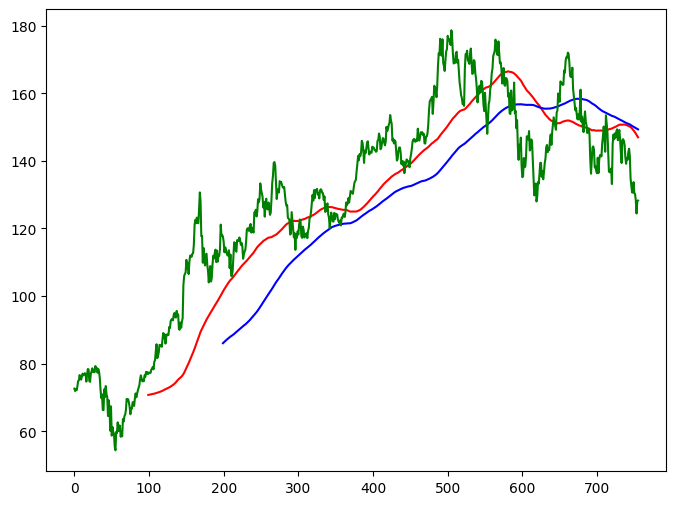

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

604

In [12]:
data_test.shape[0]

152

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.3239
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0572
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0204
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0196
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0135
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0172
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0118
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0139
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0141
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0137
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0115
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0108
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0104
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0110
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0112
Epoc

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

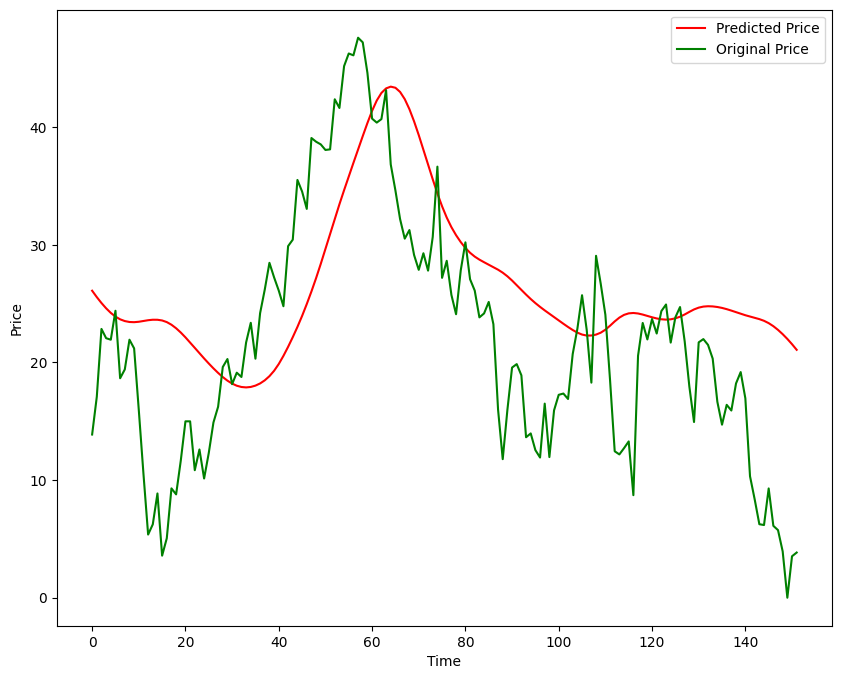

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')